<a href="https://colab.research.google.com/github/Santhosh-S14/COMP-6771-Project/blob/main/COMP_6771_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

4422102/4422102 [==============================] - 1s 0us/step


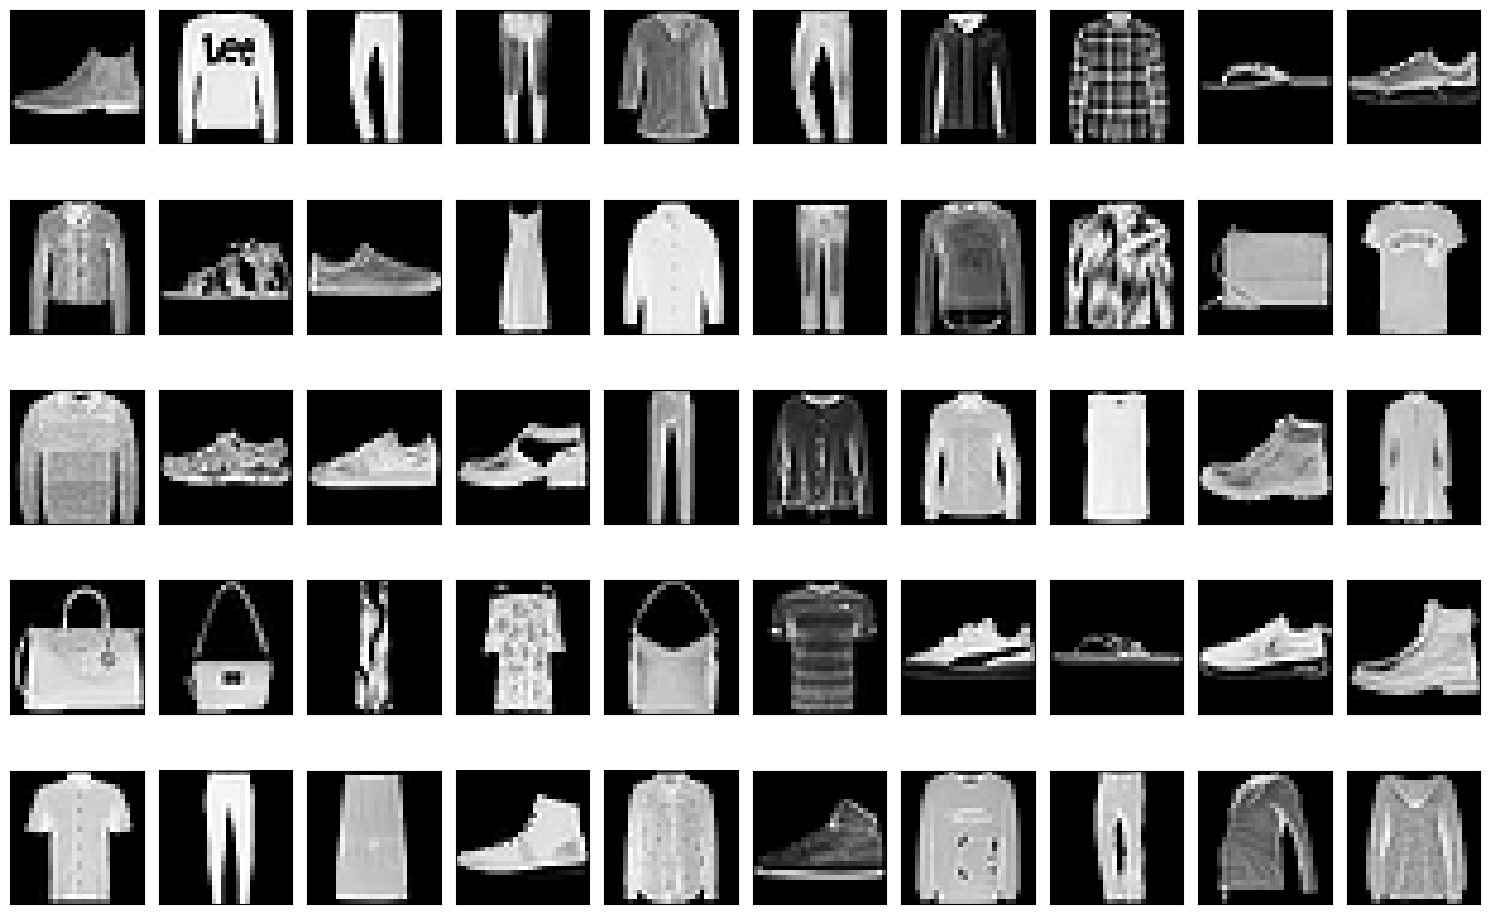

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

num_row = 5
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(50):
  ax = axes[i//num_col, i%num_col]
  ax.imshow(x_test[i], cmap='gray')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)
plt.tight_layout()
plt.show()

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /255
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [4]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [5]:
input_shape = (28, 28, 1)

inputs = Input(shape=input_shape)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [6]:
autoencoder = Model(inputs, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=200,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
300/300 [==============================] - 13s 6ms/step - loss: 0.0199 - val_loss: 0.0113
Epoch 2/30
300/300 [==============================] - 2s 5ms/step - loss: 0.0100 - val_loss: 0.0089
Epoch 3/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0083 - val_loss: 0.0077
Epoch 4/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0073 - val_loss: 0.0070
Epoch 5/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 6/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 7/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 8/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 9/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 10/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0058 - val_loss: 0.005

In [7]:
pred = autoencoder.predict(x_test_noisy)
pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28, 1)

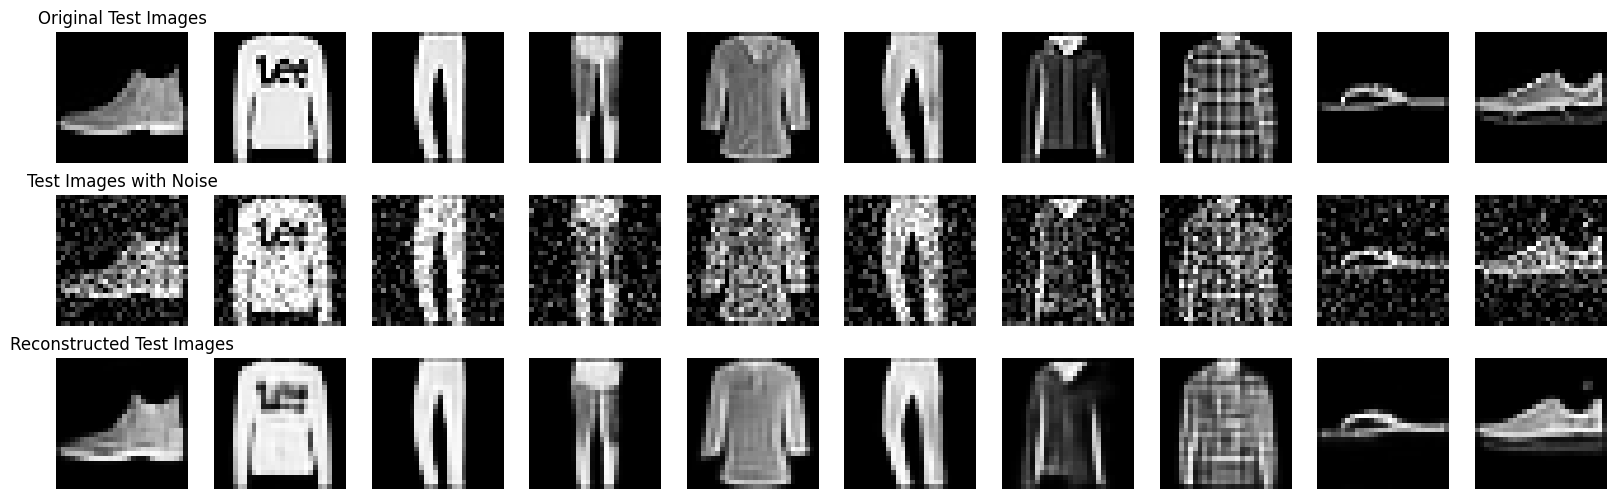

In [8]:
x_test = np.reshape(x_test, (10000,28,28)) *255
pred = np.reshape(pred, (10000,28,28)) *255
x_test_noisy = np.reshape(x_test_noisy, (-1,28,28)) *255

fig, axs = plt.subplots(3, 10, figsize=(20, 6))

for i in range(10):
    axs[0, i].imshow(x_test[i], cmap='gray')
    axs[0, i].axis('off')
axs[0, 0].set_title('Original Test Images')

for i in range(10):
    axs[1, i].imshow(x_test_noisy[i], cmap='gray')
    axs[1, i].axis('off')
axs[1, 0].set_title('Test Images with Noise')

for i in range(10):
    axs[2, i].imshow(pred[i], cmap='gray')
    axs[2, i].axis('off')
axs[2, 0].set_title('Reconstructed Test Images')

plt.show()


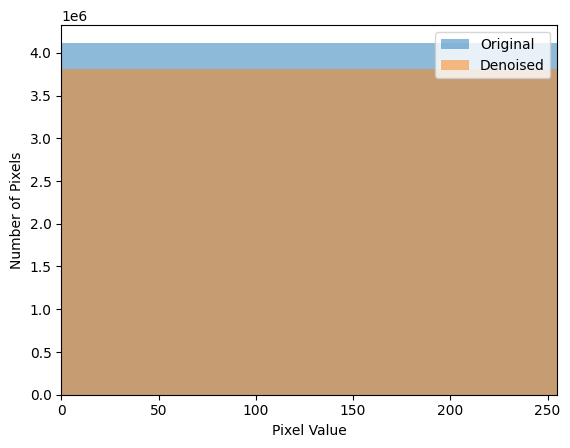

In [20]:
import matplotlib.pyplot as plt

# Flatten the images and convert to grayscale
orig_flat = x_test.flatten() / 255.0
denoised_flat = pred.flatten() / 255.0

# Plot histograms
plt.hist(orig_flat, bins=50, alpha=0.5, label='Original')
plt.hist(denoised_flat, bins=50, alpha=0.5, label='Denoised')
plt.xlim(0, 255)
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')
plt.legend()
plt.show()
